In [16]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import sqlite3

from rubin_sim.utils import approx_ra_dec2_alt_az, Site


In [49]:
con = sqlite3.connect('twi_neo_amm2.5_riz_v3.1_10yrs.db')
obs = pd.read_sql('select observationId,altitude,azimuth,solarElong,visitExposureTime from observations;', con)
con.close()

In [5]:
obs

,observationId,altitude,azimuth
0,0,76.932475,24.226278
1,1,75.269725,12.153061
2,2,76.031418,0.149759
3,3,73.157668,2.650180
4,4,70.763003,355.707095
...,...,...,...
2107608,2107608,71.199018,332.743491
2107609,2107609,68.144348,335.166922
2107610,2107610,68.978732,326.547733
2107611,2107611,72.184332,312.630417


In [9]:
vat = pd.read_csv('twi_neo_amm2.5_riz_v3.1_10yrs__vatiras_granvik_10k_obs.txt', comment='#', sep=' ')

In [10]:
vat

,obj_id,time,ra,dec,dradt,ddecdt,phase,solarelon,helio_dist,geo_dist,...,observationStartMJD,rotSkyPos,seeingFwhmEff,seeingFwhmGeom,solarElong,visitExposureTime,dmag_color,dmag_trail,dmag_detect,Unnamed: 27
0,7,62468.022408,286.860397,-25.551065,1.091453,0.514267,66.371091,39.648208,0.687175,1.035076,...,62468.022408,200.456505,1.834949,1.560328,38.781092,15.0,-0.399899,0.058521,0.050731,NaN
1,9,63952.043155,313.433476,-37.518278,0.895674,0.087779,88.006983,40.453326,0.638769,0.770837,...,63952.043155,246.373750,1.288060,1.110785,40.065262,15.0,-0.399899,0.062902,0.055446,NaN
2,9,63952.046258,313.436980,-37.518005,0.895957,0.087865,88.009799,40.453326,0.638768,0.770806,...,63952.046258,245.841889,1.137185,0.986766,40.062514,15.0,-0.399899,0.075316,0.069377,NaN
3,9,63952.049360,313.440485,-37.517733,0.896240,0.087948,88.012613,40.453327,0.638767,0.770775,...,63952.049360,245.307742,1.220671,1.055391,40.059766,15.0,-0.399899,0.068088,0.061164,NaN
4,10,63795.959667,145.117635,-5.429129,0.882721,-0.654349,73.011241,38.152620,0.656510,0.990985,...,63795.959667,185.815500,1.425326,1.223618,39.948931,15.0,-0.399899,0.073550,0.067345,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41259,9994,63600.362149,242.239813,-45.303317,0.980218,-0.486938,110.009654,40.556768,0.680457,0.514218,...,63600.362149,34.388654,1.516638,1.298677,41.338583,15.0,-0.264722,0.066817,0.059749,NaN
41260,9994,63600.362385,242.240141,-45.303432,0.980185,-0.486923,110.009502,40.556777,0.680457,0.514219,...,63600.362385,35.080117,1.513065,1.295740,41.229634,15.0,-0.264722,0.067044,0.060002,NaN
41261,9998,63956.352174,224.990197,-22.530888,0.874156,-0.191609,86.416402,44.623980,0.692300,0.743298,...,63956.352174,141.067043,1.526395,1.306697,44.838507,15.0,-0.264722,0.048332,0.040195,NaN
41262,9998,63956.355303,224.993158,-22.531488,0.873881,-0.191566,86.414865,44.624342,0.692305,0.743312,...,63956.355303,140.842681,1.224915,1.058880,44.841675,15.0,-0.264722,0.067071,0.060031,NaN


In [31]:
site = Site(name='LSST')
alt, az = approx_ra_dec2_alt_az(vat['ra'].values, vat['dec'].values, site._latitude_deg, site._longitude_deg, vat['observationStartMJD'].values)

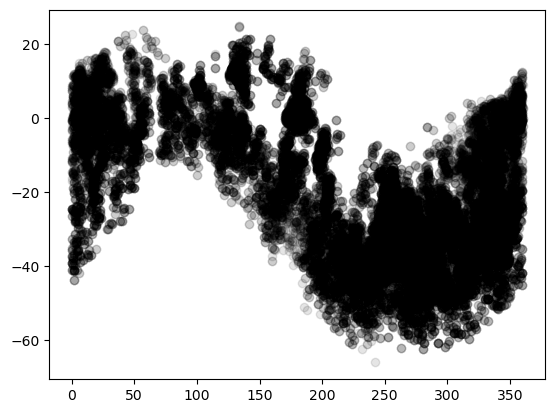

In [13]:

plt.plot(vat['ra'], vat['dec'], 'ko', alpha=.1)

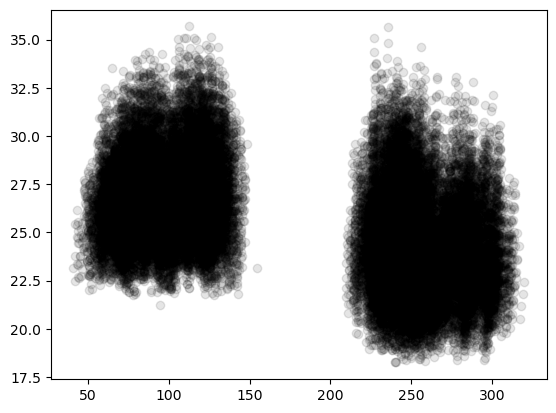

In [32]:
plt.plot(az, alt, 'ko', alpha=.1)

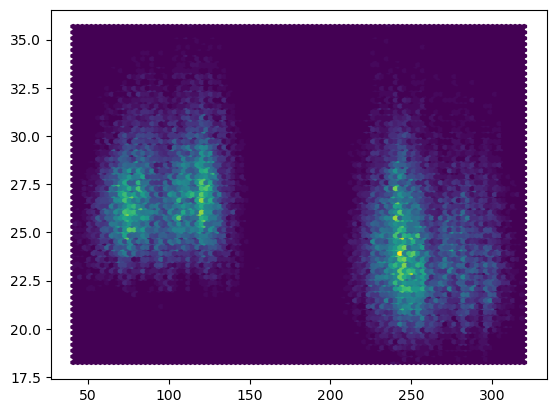

In [35]:
plt.hexbin(az, alt)

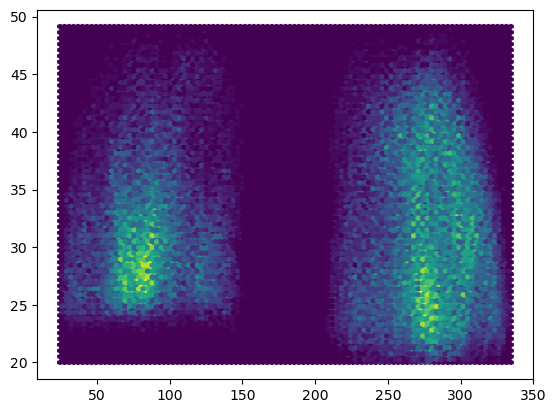

In [54]:
short = np.where(obs['visitExposureTime'] < 20)
plt.hexbin(obs['azimuth'].values[short], obs["altitude"].values[short])

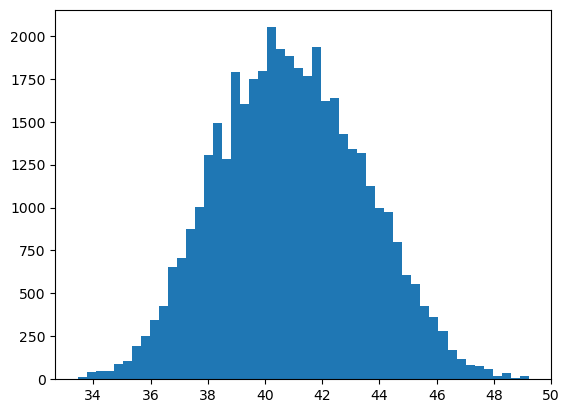

In [38]:
_temp = plt.hist(vat['solarelon'], bins=50)

In [48]:
obs['solarElong']

0          113.482915
1          113.261929
2          110.616357
3          112.911654
4          112.425621
              ...    
2107608    118.795081
2107609    120.809866
2107610    121.471985
2107611    119.545571
2107612    121.939207
Name: solarElong, Length: 2107613, dtype: float64

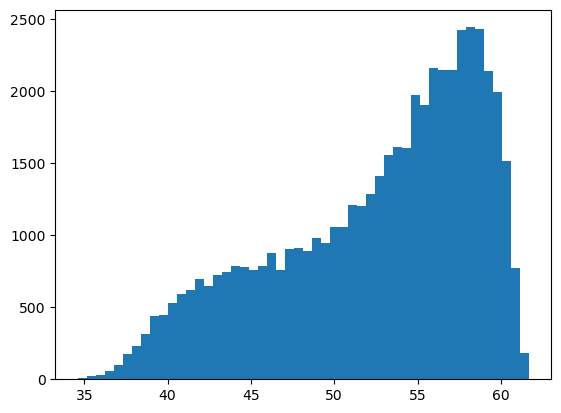

In [52]:
_tmp = plt.hist(obs['solarElong'].values[np.where(obs["visitExposureTime"] < 20.)], bins=50)

In [ ]:
# looks like we should not bother with observations that have solar elongation > 50. 
# Yet, that's where most of the observations are going!  
# Also shows up as it's not worth it to go above altitude of 35 deg. 